# **Example**
---


In [17]:
# Load packages used in this notebook
import os
import json
import shutil
import urllib.request
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Install package CmdStanPy
!pip install --upgrade cmdstanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Install pre-built CmdStan binary
# (faster than compiling from source via install_cmdstan() function)
tgz_file = 'colab-cmdstan-2.23.0.tar.gz'
tgz_url = 'https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz'
if not os.path.exists(tgz_file):
    urllib.request.urlretrieve(tgz_url, tgz_file)
    shutil.unpack_archive(tgz_file)

In [4]:
# Specify CmdStan location via environment variable
os.environ['CMDSTAN'] = './cmdstan-2.23.0'
# Check CmdStan path
from cmdstanpy import CmdStanModel, cmdstan_path
cmdstan_path()

'cmdstan-2.23.0'

In [7]:
from numpy import * 

cont_zp = 500.0
cont_slope = 5.0
amplitude = 150.0
width = 0.5
center = 5.0

# Next, a grid of wavelenght channels (assumed to have no uncertainty)
wave = linspace(0,10,100)

# The 'true' observations
flux = amplitude*exp(-0.5*power(wave-center,2)/width**2) + \
       cont_zp + cont_slope*wave

# The actual observations = true observations + Poisson noise
obs_flux = random.poisson(flux)

Text(0, 0.5, 'Counts')

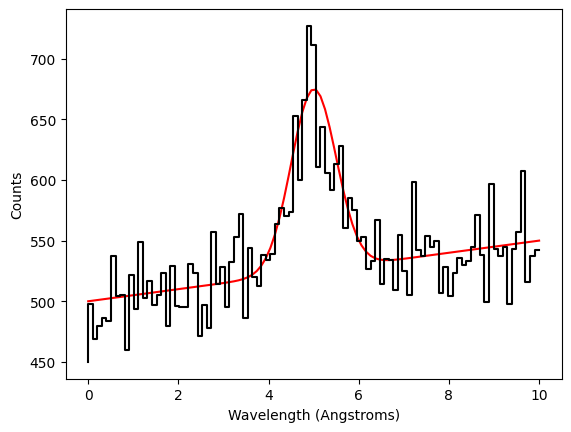

In [8]:
%matplotlib inline
from matplotlib.pyplot import subplots,plot,step,xlabel,ylabel,show,subplots
fig,ax = subplots(1,1)
ax.plot(wave, flux, 'r-')
ax.step(wave, obs_flux, color='k')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Counts')

In [19]:
model_string = '/content/drive/MyDrive/Github_rep/colab_python/example.stan'

In [21]:
with open(model_string, 'r') as fd:
        print('\n'.join(fd.read().splitlines()))

data {
  int <lower=1> N;      // number of data points
  vector[N] wave;       // the wavelengths
  vector[N] flux;       // the observed flux values
}

parameters {
  real<lower=-1000, upper=1000> cont;  // continuum level
  real<lower=-100, upper=100> slope;   // continuum slope
  real<lower=0, upper=1000> amp;       // amplitude of Gaussian
  real <lower=0, upper=10> center;     // center of the line
  real <lower=0, upper=10> width;      // scale
}

model {
  vector[N] mod_flux;    // the model flux

  // continuum slope + Gaussian
  mod_flux = amp*exp(-0.5*square(center - wave)/square(width)) +
             cont + slope*wave;
  // Poisson is approximately Normal with sigma = sqrt(counts)
  flux ~ normal(mod_flux, sqrt(flux));
}


In [15]:
idata = dict(N=len(wave), wave=wave, flux=obs_flux)

In [22]:
# Run CmdStanPy Hello, World! example
from cmdstanpy import cmdstan_path, CmdStanModel

# Compile example model bernoulli.stan
example_model = CmdStanModel(stan_file = model_string)

# Condition on example data bernoulli.data.json
example_fit = example_model.sample(data = idata, seed = 123)


20:13:07 - cmdstanpy - INFO - compiling stan file /content/drive/MyDrive/Github_rep/colab_python/example.stan to exe file /content/drive/MyDrive/Github_rep/colab_python/example
INFO:cmdstanpy:compiling stan file /content/drive/MyDrive/Github_rep/colab_python/example.stan to exe file /content/drive/MyDrive/Github_rep/colab_python/example
DEBUG:cmdstanpy:cmd: make /content/drive/MyDrive/Github_rep/colab_python/example
cwd: cmdstan-2.23.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/drive/MyDrive/Github_rep/colab_python/example.hpp /content/drive/MyDrive/Github_rep/colab_python/example.stan
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare      -I stan/lib/stan_math/lib/tbb_2019_U8/include -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.3 -I stan/lib/stan_math/lib/boost_1.72.0 -I stan/lib/stan_math/lib/sundials_5.2.0/include    -DBOOST_DISABLE_ASSERTS      -c -MT /content/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/MyDrive/Github_rep/colab_python/example', 'id=1', 'random', 'seed=123', 'data', 'file=/tmp/tmpbouzrc_i/if2edwuw.json', 'output', 'file=/tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/MyDrive/Github_rep/colab_python/example', 'id=2', 'random', 'seed=123', 'data', 'file=/tmp/tmpbouzrc_i/if2edwuw.json', 'output', 'file=/tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/MyDrive/Github_rep/colab_python/example', 'id=3', 'random', 'seed=123', 'data', 'file=/tmp/tmpbouzrc_i/if2edwuw.json', 'output', 'file=/tmp

20:13:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/MyDrive/Github_rep/colab_python/example', 'id=1', 'random', 'seed=123', 'data', 'file=/tmp/tmpbouzrc_i/if2edwuw.json', 'output', 'file=/tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_1.csv
 console_msgs (if any):
	/tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000

In [23]:
# Print a summary of the posterior sample
example_fit.summary()

DEBUG:cmdstanpy:cmd: cmdstan-2.23.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_file=/tmp/tmpbouzrc_i/stansummary-example-32fe2czk.csv /tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_1.csv /tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_2.csv /tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_3.csv /tmp/tmpbouzrc_i/example1kclyb1f/example-20230601201344_4.csv
cwd: None


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-47.280000,0.036535,1.598050,-50.380600,-46.98750,-45.317100,1913.23,1464.38,1.000750
cont,494.619000,0.092985,4.698180,486.828000,494.58400,502.286000,2552.91,1953.98,1.000150
slope,5.349030,0.015377,0.782101,4.028760,5.34724,6.646100,2586.82,1979.93,1.000450
amp,136.889000,0.202484,10.981900,119.171000,136.86100,155.141000,2941.52,2251.42,1.000010
center,5.044390,0.000812,0.044650,4.971480,5.04399,5.119350,3020.92,2312.19,1.000410
width,0.522981,0.001007,0.054664,0.436699,0.52129,0.618386,2947.12,2255.71,0.999676


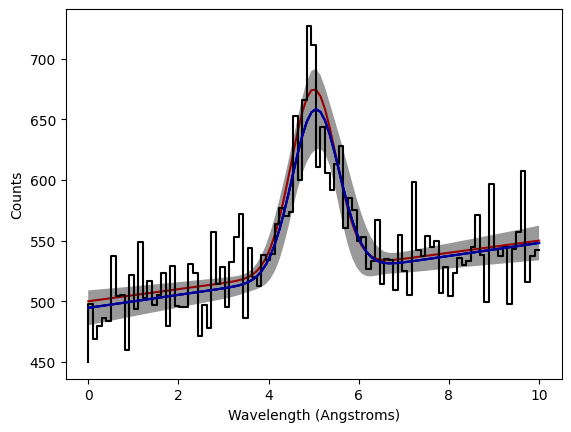

In [34]:
def Gauss(x, amp, center, width, cont, slope):
  return amp*exp(-0.5*power(x-center,2)/width**2) + cont +\
        slope*x

mamp = median(example_fit.stan_variable('amp'))
mcont = median(example_fit.stan_variable('cont'))
mslope = median(example_fit.stan_variable('slope'))
mcenter = median(example_fit.stan_variable('center'))
mwidth = median(example_fit.stan_variable('width'))
xx = linspace(wave.min(), wave.max(), 100)
yy = Gauss(xx, mamp, mcenter,mwidth,mcont, mslope)
ax.plot(xx, yy, '-', color='b')
yys = [Gauss(xx, example_fit.stan_variable('amp')[ii*10], example_fit.stan_variable('center')[ii*10],
             example_fit.stan_variable('width')[ii*10], example_fit.stan_variable('cont')[ii*10], 
             example_fit.stan_variable('slope')[ii*10]) \
             for ii in range(100)]
sdy = std(yys, axis=0)
ax.fill_between(xx, yy-3*sdy, yy+3*sdy, facecolor='k', alpha=0.4, zorder=10)
fig